#### Fake banknotes assignment

##### Tasks:
    Data preprocessing:
        Indexing the data with proper column if necessary
        Creating better Column names
        Snipping only the useful column (or variable) out of many in the dataframe
        Find if the data has missing vales (i.e., NaN values) for either dropping them or filling them with different ways (ffill, bfill, 0, or average)
        Sorting and Filtering the data as necessary
        Normalize the data if necessary
        
    Data explorations:
        Observe data shape, size, and feature (dtype using describe function in numpy)
        Convert the datatype into integer or floats if necessary for further statistical analysis
        Conduct all central tendency analysis (Mean, Standard Deviation, Median etc.)
        Visualization of the data in Scatterplot (Scatterplot is usually the foundation of all other complex data visualization)
        Conduct Ellipse analysis to find outliers
        
    Data Analysis:
        Conduct Clustered Mean analysis to identify clustering pattern and trend
        Evaluate the data for KMeans clustering

Data preprocessing

In [2]:
import pandas as pd #need to import the csv file into a dataframe
Banknote_auth = pd.read_csv("Banknote_authentic.csv")
Banknote_auth.head()

<ipython-input-2-bcfc6fc94786>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd #need to import the csv file into a dataframe


,V1,V2
0,3.62160,8.6661
1,4.54590,8.1674
2,3.86600,-2.6383
3,3.45660,9.5228
4,0.32924,-4.4552


In [31]:
#Indexing does not seem to be necessary
# We shall rename the column with the variable name that representative of the data
Banknote_auth['Variance'] = Banknote_auth['V1']
Banknote_auth['Skewness'] = Banknote_auth['V2'] #Should have used replace function for syntax efficiency but forgot
Banknote_auth.drop(["V1", "V2"], axis = 1, inplace = True)
Banknote_auth.head()

,Variance,Skewness
1233,-7.0421,9.2000
1294,-7.0364,9.2931
1172,-6.9599,8.9931
989,-6.7526,8.8172
1203,-6.7387,6.9879


In [38]:
#We need both variables so we are not snipping speific columns
# We are now sorting the data but not filtering specific range of dataset

Banknote_auth.sort_values("Variance", inplace = True)
print(Banknote_auth.head(), Banknote_auth.min())

      Variance  Skewness
1233   -7.0421    9.2000
1294   -7.0364    9.2931
1172   -6.9599    8.9931
989    -6.7526    8.8172
1203   -6.7387    6.9879 Variance    -7.0421
Skewness   -13.7731
dtype: float64


In [41]:
print(Banknote_auth.tail(),Banknote_auth.max())

     Variance  Skewness
199    5.8862    5.8747
513    5.9374    6.1664
215    6.0919    2.9673
28     6.5633    9.8187
634    6.8248    5.2187 Variance     6.8248
Skewness    12.9516
dtype: float64


In [45]:
#Calculating the range of the variables 
Banknote_auth.max() - Banknote_auth.min() 

Variance    13.8669
Skewness    26.7247
dtype: float64

In [33]:
#checking for missing data
if Banknote_auth.isnull().values.any():
    print ("Missing data found")
else:
    print ("no Missing data found")
print(Banknote_auth.isnull().head(10))

no Missing data found
      Variance  Skewness
1233     False     False
1294     False     False
1172     False     False
989      False     False
1203     False     False
1264     False     False
1142     False     False
1225     False     False
867      False     False
1286     False     False


Data exploration 

In [34]:
#General descriptive analysis
Banknote_auth.describe()

,Variance,Skewness
count,1372.000000,1372.000000
mean,0.433735,1.922353
std,2.842763,5.869047
min,-7.042100,-13.773100
25%,-1.773000,-1.708200
50%,0.496180,2.319650
75%,2.821475,6.814625
max,6.824800,12.951600


In [42]:
Banknote_auth.shape

(1372, 2)

In [43]:
#Ok we seem to be able check if the dataframe has got null values through data info 
Banknote_auth['Variance'].info()

<class 'pandas.core.series.Series'>
Index: 1372 entries, 1233 to 634
Series name: Variance
Non-Null Count  Dtype  
--------------  -----  
1372 non-null   float64
dtypes: float64(1)
memory usage: 21.4 KB


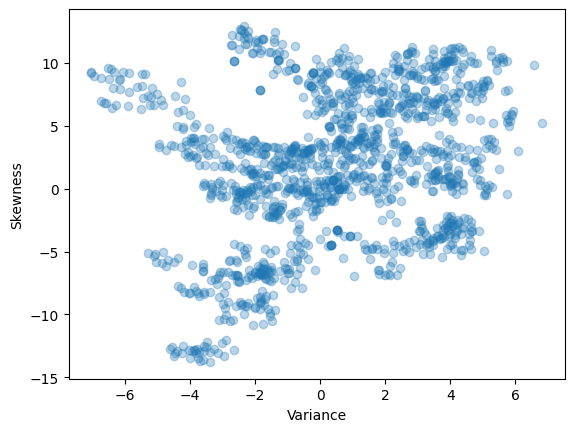

In [10]:
#Basic visualizaiton to see the relationship between the data
import matplotlib.pyplot as plt
plt.xlabel("Variance")
plt.ylabel("Skewness")
plt.scatter(Banknote_auth['Variance'], Banknote_auth['Skewness'], alpha = 0.30)

#Not much pattern at all. Lets see KMean will help provide any pattern as such

<ipython-input-20-d29e5fe85d47>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Ellipse = patches.Ellipse([Mean[0], Mean[1]], Std_dev[0]*2, Std_dev[1]*2, alpha = 0.5)
<ipython-input-20-d29e5fe85d47>:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  graph.scatter(Mean[0], Mean[1])


Text(0, 0.5, 'Skewness')

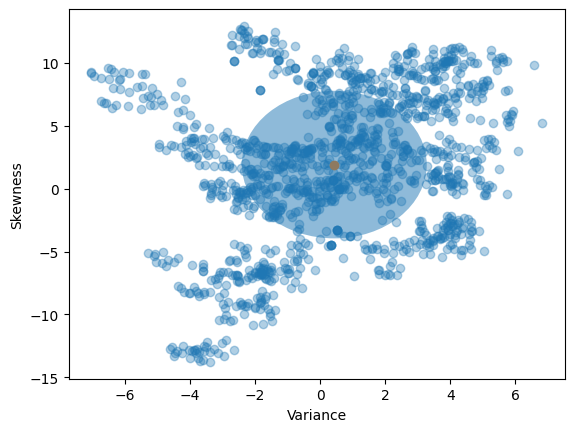

In [20]:
#Checking for outlier with Ellipse
import matplotlib.pyplot as plt
import matplotlib.patches as patches

Mean = Banknote_auth.mean()
Std_dev = Banknote_auth.std()

Ellipse = patches.Ellipse([Mean[0], Mean[1]], Std_dev[0]*2, Std_dev[1]*2, alpha = 0.5)

fig, graph = plt.subplots()
graph.scatter(Banknote_auth['Variance'], Banknote_auth['Skewness'],alpha = 0.35)
graph.scatter(Mean[0], Mean[1])
graph.add_patch(Ellipse)
plt.xlabel("Variance")
plt.ylabel("Skewness")
#Too many outliers. Need to learn how to drop outliers

In [60]:
#Identifying the number and proportion of data that are outliers
clf = EllipticEnvelope(contamination=0.3)  # Adjust contamination as needed
clf.fit(Banknote_auth)
y_pred = clf.predict(Banknote_auth)
num_outliers = sum(y_pred == -1)
print(num_outliers)

412


In [61]:
total_data_points = len(y_pred)
proportion_outliers = num_outliers / total_data_points
print(f"There are {num_outliers} outliers in the data frame which amounts to {proportion_outliers} percentage of the dataframe") #Just playing around with this style of print
#This analysis is biased and cannot be trusted

There are 412 outliers in the data frame which amounts to 0.30029154518950435 percentage of the dataframe


In [95]:
#Calculating the KMean
import numpy as np
Banknote_auth_array = np.column_stack([Banknote_auth['Variance'], Banknote_auth['Skewness']])

from sklearn.cluster import KMeans
KMean_Banknote_auth = KMeans(n_clusters = 3).fit(Banknote_auth_array)
KMean_Banknote_auth.cluster_centers_

array([[ 0.45931618,  1.19958765],
       [ 1.23085963,  8.35227115],
       [-0.93193924, -6.94367617]])

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

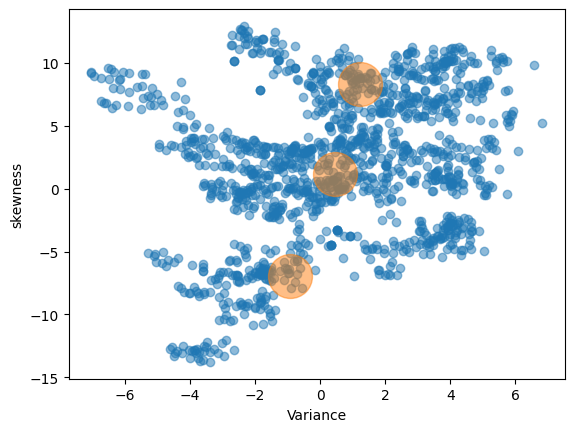

In [96]:
cluster_Banknote_auth = KMean_Banknote_auth.cluster_centers_
plt.scatter(Banknote_auth['Variance'], Banknote_auth['Skewness'], alpha=0.5)
plt.scatter(cluster_Banknote_auth[:, 0], cluster_Banknote_auth[:, 1], s = 1000, alpha=0.5)

plt.xlabel("Variance")
plt.ylabel("skewness")
plt.plot
#plt.savefig("KMean banknotes")

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

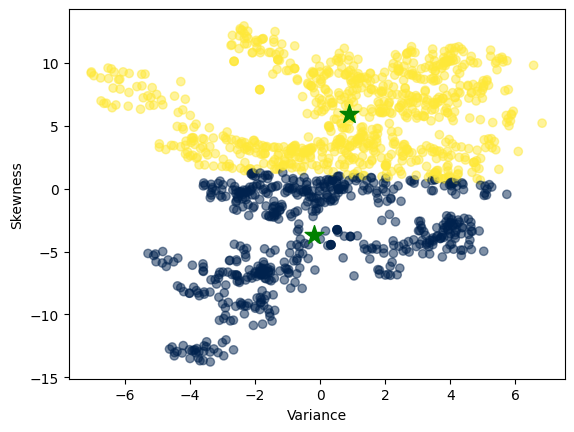

In [125]:
#Another way of clustering the coordinates based on cluster mean. The binary color clustering could mean [1, 0]
# Yes/No, or specifically in our case counterfeit banknote or legitimate banknote

KMean_Banknote_authe = KMeans(n_clusters = 2).fit(Banknote_auth_array)
y_kmeans = KMean_Banknote_authe.predict(Banknote_auth_array)
Centers = KMean_Banknote_authe.cluster_centers_

plt.scatter(Banknote_auth['Variance'], Banknote_auth['Skewness'], c=y_kmeans, cmap='cividis', alpha = 0.5)
plt.scatter(Centers[:, 0], Centers[:, 1], marker = '*', s=200, c='green')

plt.xlabel("Variance")
plt.ylabel("Skewness")
plt.plot

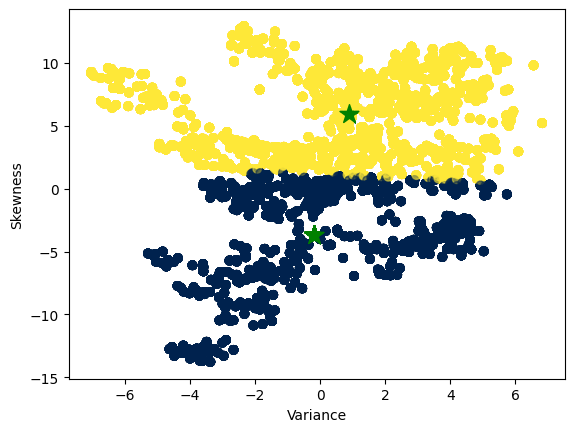

In [129]:
num_runs = 45
for runs in range(num_runs):
    plt.scatter(Banknote_auth['Variance'], Banknote_auth['Skewness'], c=y_kmeans, cmap='cividis', alpha = 0.5)
    plt.scatter(Centers[:, 0], Centers[:, 1], marker = '*', s=200, c='green')
    
    plt.xlabel("Variance")
    plt.ylabel("Skewness")
    plt.plot
    plt.savefig("Banknotes authentication testing")

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

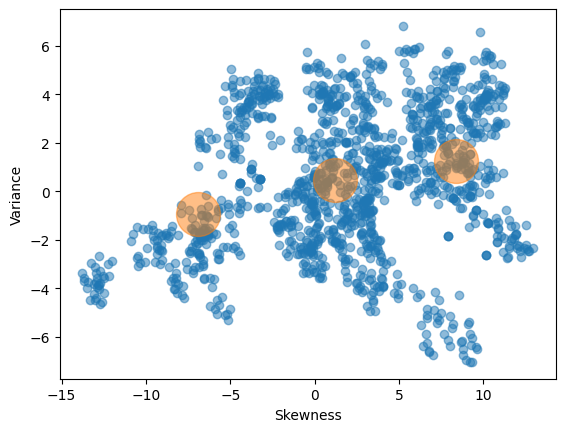

In [101]:
#lets check if we can get more intuitive plot if we flip variables in the axes
plt.scatter(Banknote_auth['Skewness'], Banknote_auth['Variance'], alpha=0.5)
plt.scatter(cluster_Banknote_auth[:, 1], cluster_Banknote_auth[:, 0], s = 1000, alpha=0.5)

plt.xlabel("Skewness")
plt.ylabel("Variance")
plt.plot

<ipython-input-99-33cf70ed5af1>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Ellipse = patches.Ellipse([Mean[0], Mean[1]], Std_dev[0]*2, Std_dev[1]*2, alpha = 0.5)
<ipython-input-99-33cf70ed5af1>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  graph.scatter(Mean[0], Mean[1])


Text(0, 0.5, 'Variance')

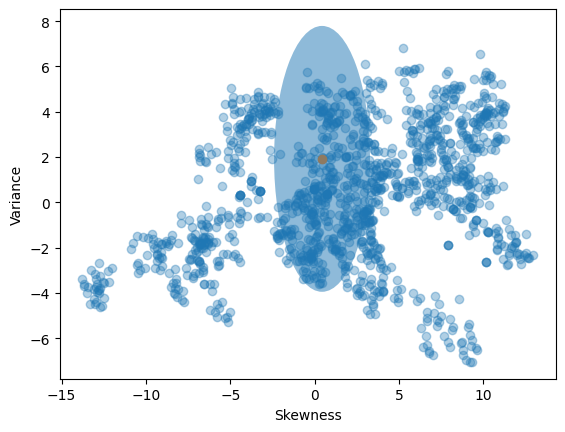

In [99]:
Mean = Banknote_auth.mean()
Std_dev = Banknote_auth.std()

Ellipse = patches.Ellipse([Mean[0], Mean[1]], Std_dev[0]*2, Std_dev[1]*2, alpha = 0.5)

fig, graph = plt.subplots()
graph.scatter(Banknote_auth['Skewness'], Banknote_auth['Variance'],alpha = 0.35)
graph.scatter(Mean[0], Mean[1])
graph.add_patch(Ellipse)
plt.xlabel("Skewness")
plt.ylabel("Variance")

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

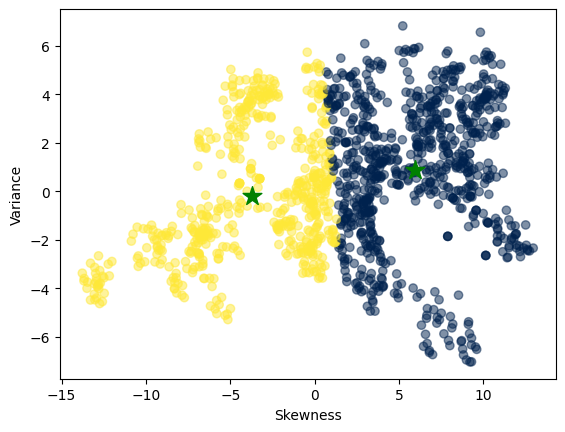

In [116]:
#Another way of clustering the coordinates based on cluster mean. The binary color clustering could mean [1, 0]
# Yes/No, or specifically in our case counterfeit banknote or legitimate banknote
KMean_Banknote_authe = KMeans(n_clusters = 2).fit(Banknote_auth_array)
y_kmeans = KMean_Banknote_authe.predict(Banknote_auth_array)
Centers = KMean_Banknote_authe.cluster_centers_

plt.scatter(Banknote_auth['Skewness'], Banknote_auth['Variance'], c=y_kmeans, cmap='cividis', alpha = 0.5)
plt.scatter(Centers[:, 1], Centers[:, 0], marker = '*', s=200, c='green')

plt.xlabel("Skewness")
plt.ylabel("Variance")
plt.plot

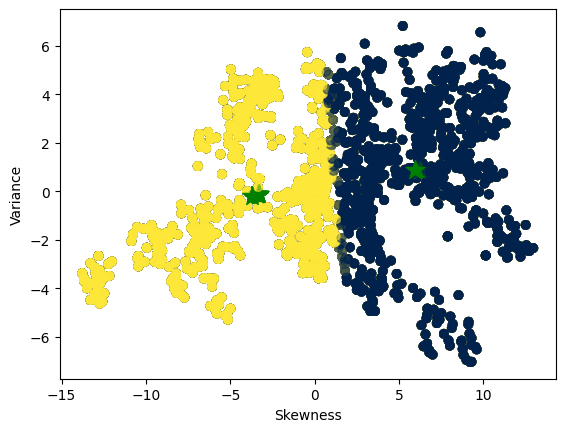

In [122]:
#So now we are running the models 45 times to test the stability of the result

num_runs = 45

for runs in range(num_runs):
    KMean_Banknote_authe = KMeans(n_clusters = 2).fit(Banknote_auth_array)
    y_kmeans = KMean_Banknote_authe.predict(Banknote_auth_array)
    Centers = KMean_Banknote_authe.cluster_centers_
    
    plt.scatter(Banknote_auth['Skewness'], Banknote_auth['Variance'], c=y_kmeans, cmap='cividis', alpha = 0.5)
    plt.scatter(Centers[:, 1], Centers[:, 0], marker = '*', s=200, c='green')
    
    plt.xlabel("Skewness")
    plt.ylabel("Variance")
    plt.plot
    #plt.savefig("KMeans stability testing")